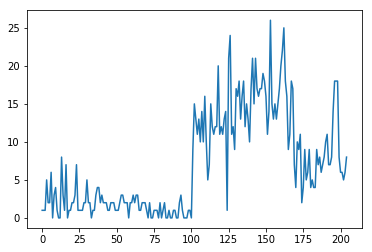

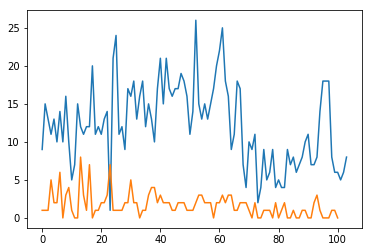

In [1]:
import scipy.io
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('Downloads/millerLab_2reach_sample.mat')
X = mat.get('X')
y = mat.get('y')

plt.plot(X[:,0]) # spike counts from neuron 1 (all trials)
plt.show()
plt.plot(X[y[:,0]!=0,0]) # spike counts from neuron 1 (left trials)
plt.plot(X[y[:,0]==0,0]) # spike counts from neuron 1 (right trials)
plt.show()

In [2]:
mu_l = np.mean(X[y[:,0]!=0,0])
mu_r = np.mean(X[y[:,0]==0,0])
x = np.arange(1,35,1)

f_l = scipy.stats.poisson (mu_l)
g_l = scipy.stats.poisson.pmf(x, mu_l)
f_r = scipy.stats.poisson (mu_r)
g_r = scipy.stats.poisson.pmf(x, mu_r)
p_l = g_l * 0.5
p_r = g_r * 0.5 
p_lr = p_l + p_r
p_l = p_l/p_lr
p_r = p_r/p_lr

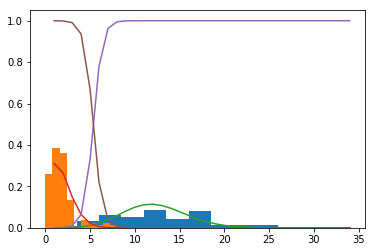

In [3]:
plt.hist((X[y[:,0]!=0,0]),normed=True)
plt.hist((X[y[:,0]==0,0]),normed=True)
plt.plot (x, g_l)
plt.plot(x,g_r)
plt.plot (x, p_l)
plt.plot(x,p_r)
plt.show()

In [37]:
f_ln = np.zeros((205,35))
f_rn = np.zeros((205,35))

c=0
while c < 205:
    k=0
    while k < 35:
        f_ln[c,k] = scipy.stats.poisson.pmf(X[c,k], np.mean(X[y[:,0]!=0,k]))*0.5
        f_rn[c,k] = scipy.stats.poisson.pmf(X[c,k], np.mean(X[y[:,0]==0,k]))*0.5
        k = k + 1
    c = c + 1

p_lr = f_ln + f_rn

f_ln = f_ln / p_lr

f_rn = f_rn / p_lr


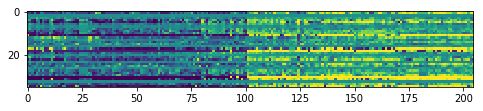

In [42]:
plt.figure(figsize=(8,8))
plt.imshow(np.transpose(f_ln))
plt.show()

In [4]:
X[y[:,0]!=0,0].shape

(104,)